# Plan d'expériences de désactivation des enzymes
Valentine a réalisé un plan d'expériences. (Une série de conditions) et a enregistré les réponses (résultats de dosages))

L'enjeu de la manip est :
1. Modeliser (Trouver une équation que relie les différents paramètres étudiés et les résultats obtenus pour chaque réponse)
2. Evaluer la qualité des modèles
2. Trouver les paramètres pour lesquels on desactive les enzymes c'est-à-dire minimiser la valeur des réponses

# 0. Préliminaire

Dans un terminal (Ctrl+Maj+ù), taper:

    pip install lestpy --upgrade

Verifier que la version est bien la 0.0.8 (si j'ai le temps d'exporter mes correctifs sinon 0.0.7 mais l'analyse de sensitilité de fonctionnera pas), sinon relancer ce script

ou si ce n'est pas installé (il faut egalement avoir installé numpy, pandas, statsmodels, scipy, SALib et sklearn)

    pip install lestpy

# 1. Import des modules

+ Modules Pandas pour la gestion des tableaux
+ Modules Lestpy pour la modélisation

In [36]:
import pandas as pd
import lestpy.lbm_model as lp

# 2. Import des données

### Obtenir le chemin d'accès au fichier de données:
Enregistrer les données à l'endroit souhaité.

Faire clique-droit sur le fichier et cliquer sur: 

    copier en tant que chemin d'accès
    

### Définition du chemin et nom du fichier de données

<!> au sens des slashs pour le chemin ! Windows met les anti-slashs \\ qu'il faut corriger en /S

In [37]:
path, fichier = "C:/Users/TTfr/Documents/Python/Analyses DOE - MD/desactivation/","resultats DOE Val apfree.xlsx"

### Import des données dans python avec pandas
import et visualisation des 5 premieres lignes avec .head(5)

In [38]:
donnees = pd.read_excel(path + fichier, decimal=',')
donnees.head(5)

,Unnamed: 0,pH,Temperatures (°C),Temps (min),[Acide pectique (%m/m)],208,207,moyenne
0,0,3.0,50,15,5,0.541167,0.722133,0.631650
1,1,9.0,50,15,5,0.661000,0.430000,0.545500
2,2,3.0,80,15,5,0.551333,0.681500,0.616417
3,3,3.0,65,5,5,0.379983,0.520817,0.450400
4,4,3.0,65,25,5,0.301867,0.930700,0.616283


### Nettoyage des données et des colonnes obsolètes
la première colonne est inutile donc on la laisse tomber (.drop() ) défitinivement (inplace = True)

Et on visualise les 5 dernières lignes ( .tail(5) )

In [39]:
donnees.drop(columns = donnees.columns[0], inplace=True)
donnees.tail(5)

,pH,Temperatures (°C),Temps (min),[Acide pectique (%m/m)],208,207,moyenne
22,6.0,65,15,0,0.035433,0.554067,0.294750
23,9.0,50,5,0,0.014333,0.036267,0.025300
24,9.0,80,25,0,0.003200,0.013900,0.008550
25,4.8,50,5,0,0.657367,0.891667,0.774517
26,4.8,80,5,0,0.735100,0.355967,0.545533


### Liste des colonnes pour séparer entre X et y

In [40]:
donnees.columns

Index([                     'pH',       'Temperatures (°C)',
                   'Temps (min)', '[Acide pectique (%m/m)]',
                             208,                       207,
                       'moyenne'],
      dtype='object')

### Définition des paramètres descriptifs X et des réponses y

et visualisation d'un descriptif de chaque tableau avec .describe()

In [41]:
y = donnees[[208,  207, 'moyenne']]
X = donnees[['pH', 'Temperatures (°C)', 'Temps (min)', '[Acide pectique (%m/m)]']]
X.describe()

,pH,Temperatures (°C),Temps (min),[Acide pectique (%m/m)]
count,27.00000,27.000000,27.000000,27.000000
mean,5.80000,63.888889,15.000000,3.888889
std,1.96899,10.127394,6.793662,3.755338
min,3.00000,50.000000,5.000000,0.000000
25%,4.80000,57.500000,15.000000,0.000000
50%,6.00000,65.000000,15.000000,5.000000
75%,6.00000,65.000000,15.000000,5.000000
max,9.00000,80.000000,25.000000,10.000000


In [42]:
y.describe()

,208,207,moyenne
count,27.000000,27.000000,27.000000
mean,0.304333,0.586670,0.445502
std,0.285070,0.306206,0.248599
min,0.003033,0.002367,0.002700
25%,0.024942,0.419325,0.293192
50%,0.294000,0.578400,0.492017
75%,0.553550,0.729033,0.575775
max,0.891900,1.342567,1.117233


# 3. Modelisation

### création d'un modèle par l'approche Lestpy 

In [43]:
model = lp.LBM_Regression()

### Premier essai - Modelisation linéaire
reponse = coef1 * pH + coef2 * T°C + coef3 * temps, etc.

Les valeurs *R-squared* pour chaque modèle sont faibles (maximum à 50%) montrant que les facteurs simples ne sont pas suffisants pour expliquer les variations des réponses.

Ce résultat est plutot conforme aux attentes. En effet, les enzymes ont un pH optimal et une temperature optimale, l'activité n'augmente donc pas avec l'augmentation de la température ou du pH par exemple. 

In [44]:
model.fit(X,y)

summary of the model for 208:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     4.764
Date:                Fri, 24 Jun 2022   Prob (F-statistic):             0.0387
Time:                        16:04:54   Log-Likelihood:                -1.5614
No. Observations:                  27   AIC:                             7.123
Df Residuals:                      25   BIC:                             9.715
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pH            -0.0579 

### Calcul de nouvelles variables 'interactions'
on calcule ces interactions en appelant la méthode .transform(X,y)


In [45]:
model.transform(X, y, interaction_list= 'ridgeless', allow_autointeraction=False, scaler='standard')

method = variable instant
calculated in 0.15 seconds


La liste affichée *['X_xor_Y', 'X_or_Y'...]* correspond aux interactions utilisées.


Le tableau est maintenant composé des facteurs simples mais aussi d'interactions entre ceux-ci

### Second essai - modélisation avec interactions
Les valeurs *R-squared* sont maintenant bien meilleures. A une exception près (modele 'C3 1570') les valeurs sont supérieures à 85% 

In [46]:
model.fit(max_regressors_nb=10, threshold=0.2)

summary of the model for 208:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     8.360
Date:                Fri, 24 Jun 2022   Prob (F-statistic):           0.000105
Time:                        16:04:55   Log-Likelihood:                 18.914
No. Observations:                  27   AIC:                            -17.83
Df Residuals:                      17   BIC:                            -4.870
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

#### On peut afficher l'expression exactes des différents modèles avec la methode .print_model()

In [47]:
model.print_model()

model for target "208"
The value of 208 is high if:
   Coefficient                                          Parameter  Std Error
0       -1.173                 pH and not [Acide pectique (%m/m)]      0.198
1       -1.734           Neither pH nor Temperatures (°C) extreme      0.450
2        0.121     Neither pH nor [Acide pectique (%m/m)] extreme      0.209
3       -1.911  Neither Temperatures (°C) nor [Acide pectique ...      0.439
4        1.552  both Temperatures (°C) and [Acide pectique (%m...      0.432
5       -0.893                   Temperatures (°C) if Temps (min)      0.226
6        0.649  Temperatures (°C) + [Acide pectique (%m/m)] or...      0.225
7        1.042              both pH and Temperatures (°C) average      0.444
8        0.281                                pH like Temps (min)      0.176



model for target "207"
The value of 207 is high if:
   Coefficient                                          Parameter  Std Error
0       -2.243                 pH and not [Aci

#### On peut avoir un résumé des scores d'ajustement des différents modèles avec la methode .fitting_score()

In [48]:
for i in y:
    model.fitting_score(y[i])

Fitting score for target "208"
                R²  adj-R²  calc-Q²
model score  0.816   0.719    0.583
Fitting score for target "207"
                R²  adj-R²  calc-Q²
model score  0.865   0.805    0.671
Fitting score for target "moyenne"
                R²  adj-R²  calc-Q²
model score  0.936   0.902    0.835


# 4. Visualisation des différentes modélisations

On visualisera différents élements en créant une instance de la classe Display() et en passant notre modèle en paramètre

In [49]:
graf = lp.Display(model)

## 4.1 Une première méthode consiste à imprimer un descriptif des modèles.
Le descriptif comprend:
1. les scores d'ajustement
2. le graph d'ajustement (y modélisé en fonction de y mesuré)
3. la distribution des résidus
4. Le graphique d'optimisation du R2 de prédiction = Q2 en fonction du nombre de facteurs dans le modèle (l'idée etant de maximiser le Q2 et minimiser le nombre de facteurs)

Fitting score for target "208"
                R²  adj-R²  calc-Q²
model score  0.816   0.719    0.583


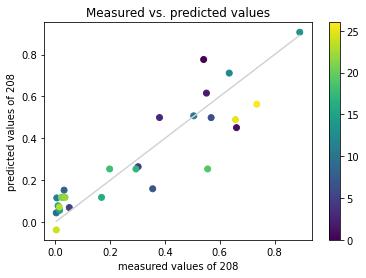

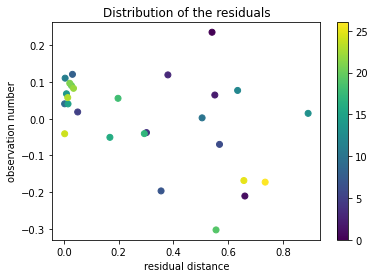

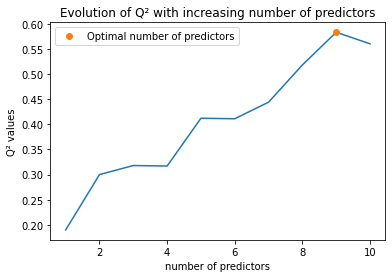

Fitting score for target "207"
                R²  adj-R²  calc-Q²
model score  0.865   0.805    0.671


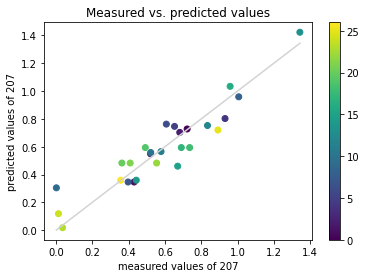

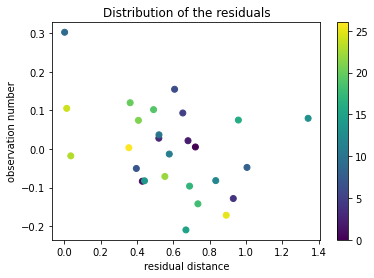

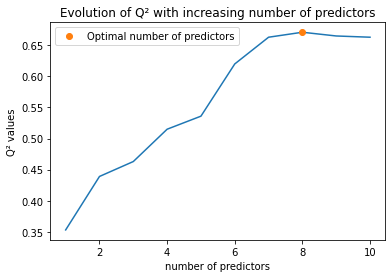

Fitting score for target "moyenne"
                R²  adj-R²  calc-Q²
model score  0.936   0.902    0.835


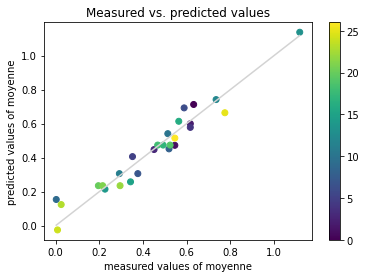

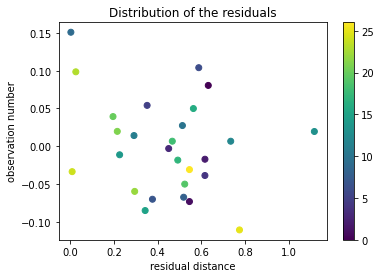

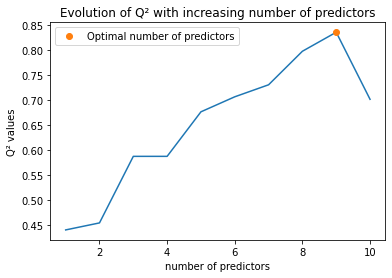

In [50]:
graf.describe()

## 4.2 Domaine experimental
On décrit d'abord le domaine expérimental (= le cadre) dans lequel aura lieu l'optimisation (quelle gamme de pH, de temp, etc.)
On a accès à une méthode automatisée .feature_analysis() qui renvoie le domaine expérimental analysée, le mélange (mix) si il y a un mélange

domain est un dictionnaire dont les clés sont les facteurs et les valeurs sont une liste comprenant :
+ [statut (inutile à ce stage), minimum, maximum, [valeurs si variable], type de variable (discrète ou continue)]

In [51]:
domain, mix = model.features_analysis(X)

## 4.3 Analyse de sensibilité
L'objectif est de voir à quel point les variation des variables seules ou en interactions sont impactantes sur la valeur finale du modèle

Sensitivity analysis for response 208


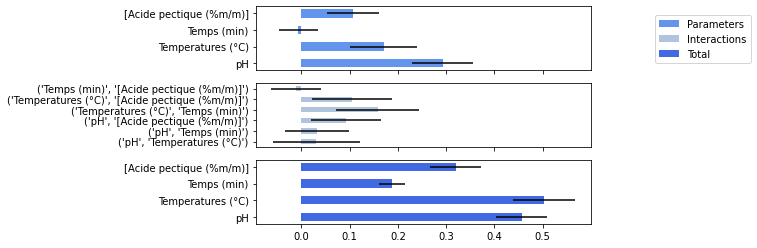

Sensitivity analysis for response 207


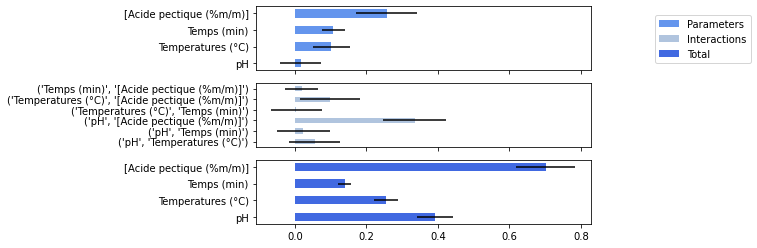

Sensitivity analysis for response moyenne


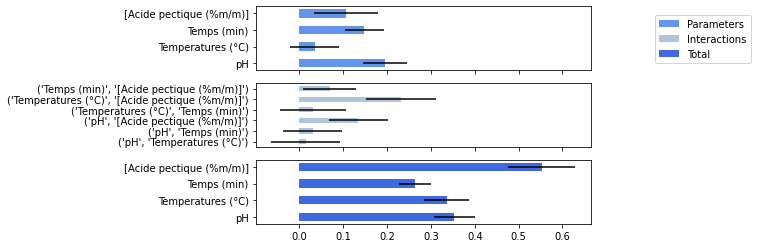

In [52]:
graf.sensibility_analysis(domain)

## 5. Optimisation

L'objectif de cette manip est de trouver les conditions idéales selon le modèle pour minimiser l'activité des enzymes donc maximiser la desactivation

In [53]:
domain, mix = model.features_analysis(X)
print(domain)

{'pH': [None, 3.0, 9.0, [3.0, 9.0, 6.0, 4.8], 'discrete'], 'Temperatures (°C)': [None, 50, 80, [50, 80, 65], 'discrete'], 'Temps (min)': [None, 5, 25, [15, 5, 25], 'discrete'], '[Acide pectique (%m/m)]': [None, 0, 10, [5, 0, 10], 'discrete']}


## 5.2 Definition des objectifs
Les objectifs sont une liste qui décrit pour chaque variable dans l'ordre l'objectif d'optimisation que l'on souhaite parmi:
minimisation, maximisation, valeur à atteindre ou aucun objectif

Ici on souhaite minimiser toutes les réponses donc on crée une liste de 8 'minimize' car il y a 8 modèles

In [54]:
target = ['minimize'] * 8
print(target)

['minimize', 'minimize', 'minimize', 'minimize', 'minimize', 'minimize', 'minimize', 'minimize']


## 5.3 Minimisation globale
On lance l'optimisation avec la méthode .optimize() dans laquelle on injecte le domaine experimental et les objectifs.

In [55]:
model.optimize(domain, target)

size = 10000
                         Mean of the 5 best results  Best result
pH                                            9.000        9.000
Temperatures (°C)                            65.000       65.000
Temps (min)                                   5.000        5.000
[Acide pectique (%m/m)]                       0.000        0.000
Pred208                                      -0.459       -0.459
Pred207                                       0.018        0.018
Predmoyenne                                  -0.171       -0.171
desirability                                  0.972        0.972


,pH,Temperatures (°C),Temps (min),[Acide pectique (%m/m)],Pred208,Pred207,Predmoyenne,desirability
0,6.0,50,5,10,0.427979,0.319206,0.614137,0.614732
1,3.0,80,15,0,0.859080,0.715721,0.763008,0.445808
2,3.0,80,15,5,0.615639,0.702760,0.599148,0.526742
3,4.8,80,15,5,0.194971,0.847523,0.405773,0.604800
4,3.0,50,25,10,1.033530,0.515385,1.088328,0.358442
...,...,...,...,...,...,...,...,...
9995,9.0,65,25,0,-0.267459,0.118974,-0.021127,0.894384
9996,6.0,65,15,10,0.179923,0.902990,0.234046,0.623558
9997,3.0,65,25,5,0.264094,0.802205,0.577460,0.571691
9998,3.0,50,25,0,1.262635,1.214607,0.980769,0.244922


On obtient deux tableaux:
1. Le premier correspond aux résulats (la condition la meilleure pour atteindre **tous les objectifs en même temps**). La désirabilité montre le score obtenu sur **ces conditions pour toutes les réponses**
3. Le second est l'ensemble des essais menés pour obtenir ces résultats (obsolete)

## 5.4 Maximisation globale
On peut faire le meme exercice pour maximiser les valeurs et donc voir les conditions optimales pour **toutes les activités en même temps**

(en laissant les objectifs à None on maximise tout)

In [56]:
maximiser = ['maximize']*8
model.optimize(domain, maximiser)

size = 10000
                         Mean of the 5 best results  Best result
pH                                            9.000        9.000
Temperatures (°C)                            80.000       80.000
Temps (min)                                  25.000       25.000
[Acide pectique (%m/m)]                      10.000       10.000
Pred208                                       1.155        1.155
Pred207                                       1.809        1.809
Predmoyenne                                   1.548        1.548
desirability                                  0.929        0.929


,pH,Temperatures (°C),Temps (min),[Acide pectique (%m/m)],Pred208,Pred207,Predmoyenne,desirability
0,9.0,65,25,0,-0.267459,0.118974,-0.021127,0.103516
1,3.0,80,25,0,0.447426,0.699218,0.531999,0.429599
2,4.8,80,5,0,0.562600,0.359134,0.514545,0.373103
3,6.0,50,15,5,0.326764,0.661026,0.447697,0.386515
4,3.0,80,15,0,0.859080,0.715721,0.763008,0.538537
...,...,...,...,...,...,...,...,...
9995,3.0,65,25,0,0.329629,0.956913,0.536030,0.449153
9996,6.0,50,15,5,0.326764,0.661026,0.447697,0.386515
9997,4.8,50,15,0,0.729876,0.973090,0.752885,0.565803
9998,9.0,50,5,0,0.071674,0.018288,0.123878,0.154960


In [57]:
domain = {'pH': [None, 3, 9, [3,6,9], 'continuous'], 'Temperatures (°C)': [None, 50, 80, [50, 80, 65], 'continuous'], 'Temps (min)': [None, 5, 25, [15, 5, 25], 'continuous'], '[Acide pectique (%m/m)]': [None, 0, 10, [5, 0, 10], 'continuous']}

In [58]:
minC3 = [None]*8
minC3[1] = 'minimize'
minC3[5] = 'minimize'

In [59]:
minimization = {'C3 1570': 'min', 'C3 0614/2': 'min'}
dataset = model.optimize(domain, minimization)

size = 10000
                         Mean of the 5 best results  Best result
pH                                            6.085        6.231
Temperatures (°C)                            63.611       62.190
Temps (min)                                  13.573       19.746
[Acide pectique (%m/m)]                       4.909        0.087
Pred208                                       0.300        0.146
Pred207                                       0.501        0.479
Predmoyenne                                   0.416        0.273
desirability                                  1.000        1.000


In [60]:
model.optimize(domain, minC3)

size = 10000
                         Mean of the 5 best results  Best result
pH                                            8.888        8.915
Temperatures (°C)                            62.246       56.330
Temps (min)                                  13.074       12.789
[Acide pectique (%m/m)]                       0.083        0.086
Pred208                                      -0.164       -0.060
Pred207                                      -0.058       -0.069
Predmoyenne                                   0.117        0.200
desirability                                  0.998        1.000


,pH,Temperatures (°C),Temps (min),[Acide pectique (%m/m)],Pred208,Pred207,Predmoyenne,desirability
0,4.300508,59.318587,18.998416,6.195948,0.379239,0.632773,0.591910,0.838291
1,3.080893,73.756782,5.736787,0.532524,0.737269,0.668133,0.599365,0.828359
2,5.459986,67.033317,12.914276,2.464038,0.249940,0.534021,0.423676,0.864852
3,3.593690,70.301321,12.354233,8.343951,0.386846,0.541113,0.493287,0.862999
4,4.537597,72.961066,9.107175,2.107746,0.361289,0.544424,0.424090,0.862131
...,...,...,...,...,...,...,...,...
9995,4.164827,50.691291,12.128827,2.276329,0.577895,0.835128,0.627034,0.777872
9996,8.157595,60.887334,12.625177,5.758252,0.118591,0.475005,0.427343,0.879977
9997,3.630139,53.202967,24.649201,2.960246,0.676605,0.851708,0.641057,0.772490
9998,7.231171,70.105863,9.570829,7.359455,0.225413,0.746323,0.361974,0.805507


In [61]:
essais = pd.DataFrame([[9,80,5,0], [9,50,5,0], [9,50,25,0], [6,50,5,0]], columns=X.columns)
model.predict(essais)

,Pred208,Pred207,Predmoyenne
0,0.256210,0.018288,-0.025159
1,0.071674,0.018288,0.123878
2,0.748522,0.118974,0.423611
3,0.255230,0.488336,0.509380


# Modelisation quadratique

In [62]:
modq = lp.LBM_Regression()
modq.transform(X,y, interaction_list='quadratic', allow_autointeraction=True)

method = variable instant
calculated in 0.023 seconds


In [63]:
modq.fit()

summary of the model for 208:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     6.791
Date:                Fri, 24 Jun 2022   Prob (F-statistic):            0.00192
Time:                        16:05:01   Log-Likelihood:                 4.6469
No. Observations:                  27   AIC:                            -1.294
Df Residuals:                      23   BIC:                             3.889
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [64]:
modq.print_model()


model for target "208"
The value of 208 is high if:
   Coefficient                              Parameter  Std Error
0        0.666  Temperatures (°C) x Temperatures (°C)      0.218
1       -0.613                                     pH      0.218
2        0.473                [Acide pectique (%m/m)]      0.217



model for target "207"
The value of 207 is high if:
   Coefficient                                    Parameter  Std Error
0        0.498                      [Acide pectique (%m/m)]      0.195
1        0.758                 pH x [Acide pectique (%m/m)]      0.188
2        0.542  Temperatures (°C) x [Acide pectique (%m/m)]      0.190
3       -0.480                                           pH      0.189
4        0.488                                  Temps (min)      0.196



model for target "moyenne"
The value of moyenne is high if:
   Coefficient                                    Parameter  Std Error
0        0.440                      [Acide pectique (%m/m)]      0.156
1 

In [65]:
lp.Interaction.get_interaction_list(family='ridgeless')

['X_and_not_Y',
 'X_xor_Y',
 'X_like_Y',
 'X_or_not_Y',
 'X_or_Y',
 'Sum_X_Y',
 'X_and_Y',
 'X_if_Y',
 'X_if_not_Y',
 'both_X_Y_average',
 'Difference_X_Y',
 'Neither_X_nor_Y_extreme']

In [66]:
#for n in lp.Interaction.interaction_list:
#    graf.display_interaction(n)

In [67]:
X.columns

Index(['pH', 'Temperatures (°C)', 'Temps (min)', '[Acide pectique (%m/m)]'], dtype='object')

In [101]:
domain = {'pH': ['toPlot', 3, 9, [3,6,9], 'continuous'], 'Temperatures (°C)': ['toPlot', 50, 80, [50, 80, 65], 'continuous'], 'Temps (min)': [15, 5, 25, [15, 5, 25], 'continuous'], '[Acide pectique (%m/m)]': [10, 0, 10, [5, 0, 10], 'discrete']}

screened_var ['pH', 'Temperatures (°C)']
size = 150


c:\Users\TTfr\Documents\Python\lestpy\lestpy\lbm_model.py:1336: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


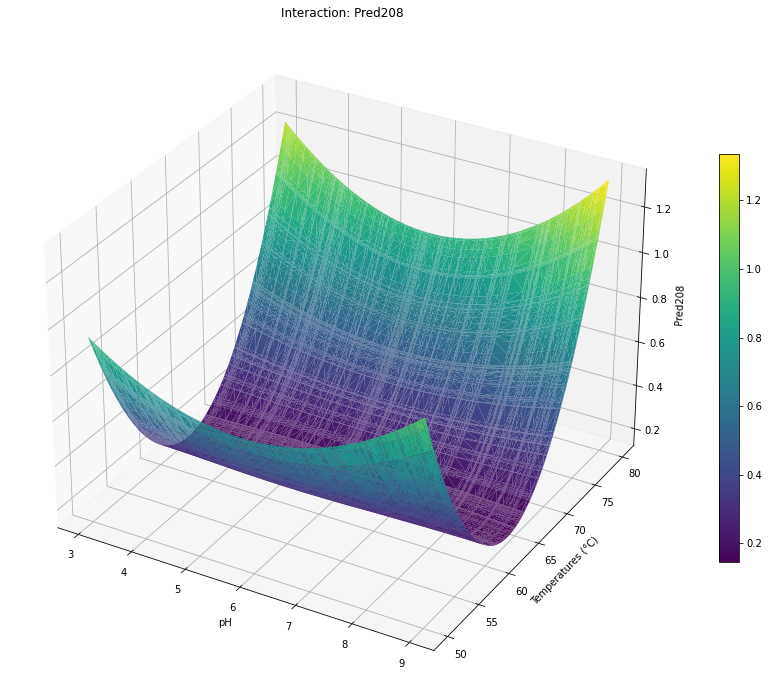

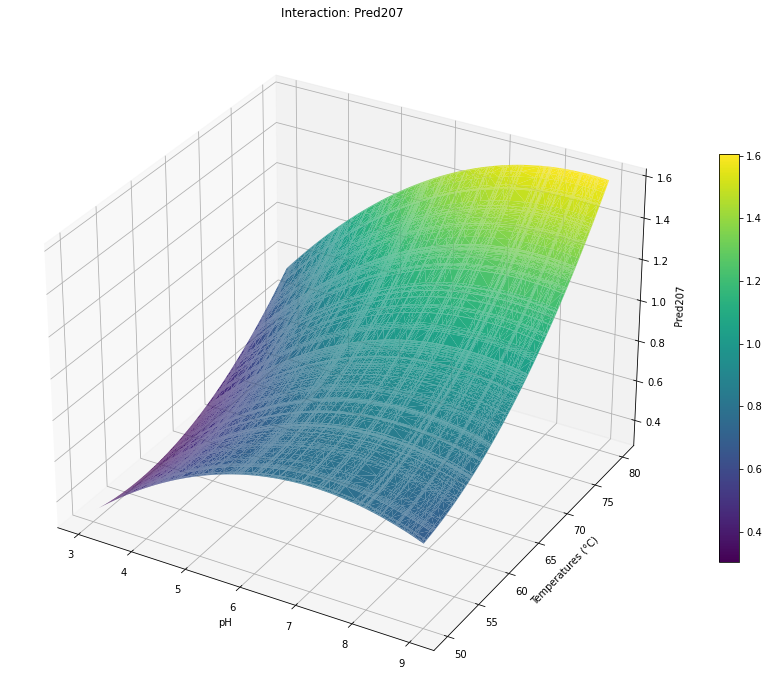

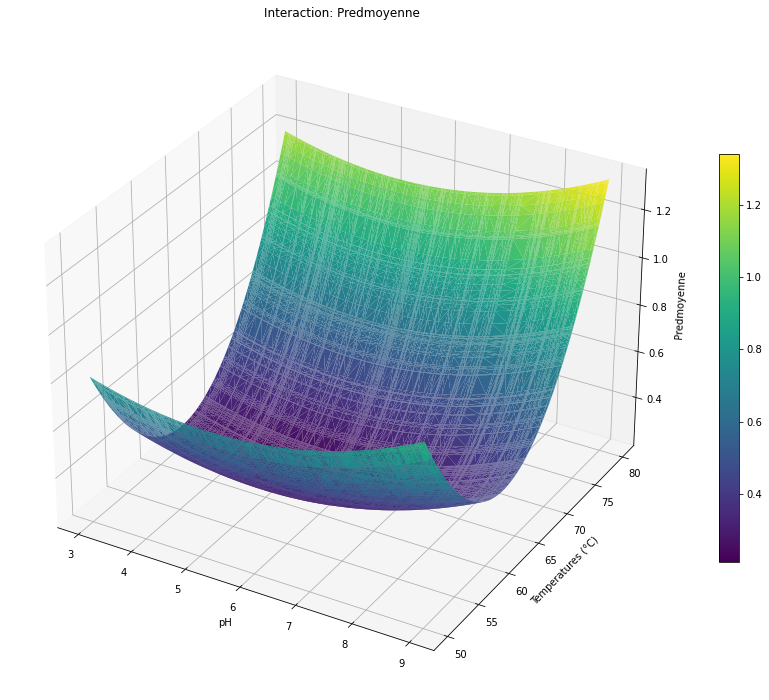

In [102]:
graph = lp.Display(model)
graph.response_surface(experimental_domain=domain, size=150)

In [103]:
pf = graf.pareto_frontier(dataset, ['PredC3 1570',	'PredC3 0614/2'], ['maximize','maximize' ])

KeyError: 'PredC3 1570'

In [ ]:
oi = lp.Outliers_Inspection(model)

<!> in development <!>
threshold (4/n) = 0.148
potential outliers : [(1, 0.21274946660441302), (12, 0.19640598687717892), (24, 0.1716316380787345)]


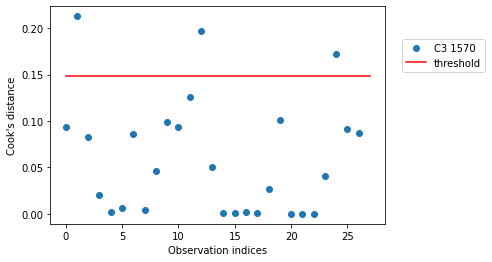

       obs      endog     fitted     Cook's   student.   hat diag    dffits   ext.stud.     dffits
                           value          d   residual              internal   residual           
--------------------------------------------------------------------------------------------------
         0      0.541      0.725      0.093     -1.309      0.303     -0.864     -1.336     -0.881
         1      0.661      0.392      0.213      1.933      0.313      1.305      2.099      1.417
         2      0.551      0.725      0.083     -1.236      0.303     -0.816     -1.255     -0.828
         3      0.380      0.438      0.020     -0.459      0.434     -0.402     -0.449     -0.393
         4      0.302      0.277      0.002      0.180      0.318      0.123      0.175      0.119
         5      0.051      0.105      0.007     -0.381      0.270     -0.232     -0.372     -0.226
         6      0.568      0.292      0.086      1.813      0.174      0.832      1.940      0.890
         7

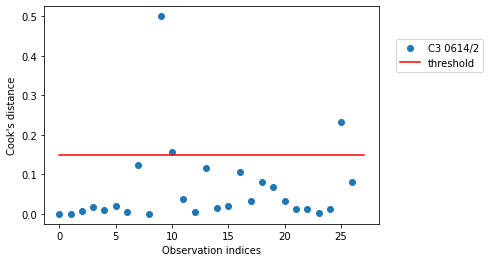

       obs      endog     fitted     Cook's   student.   hat diag    dffits   ext.stud.     dffits
                           value          d   residual              internal   residual           
--------------------------------------------------------------------------------------------------
         0      0.722      0.713      0.001      0.115      0.378      0.090      0.112      0.087
         1      0.430      0.426      0.000      0.038      0.181      0.018      0.037      0.017
         2      0.682      0.659      0.007      0.291      0.463      0.270      0.283      0.262
         3      0.521      0.549      0.017     -0.392      0.528     -0.415     -0.382     -0.405
         4      0.931      0.957      0.009     -0.344      0.441     -0.306     -0.335     -0.298
         5      0.653      0.689      0.020     -0.473      0.471     -0.446     -0.462     -0.436
         6      0.608      0.578      0.006      0.345      0.319      0.237      0.336      0.230
         7

In [ ]:
oi.cooks_distance()